# PRACTICING WITH DARTS

In this activity we are going to practice the concepts of Time Series and the **DARTS** library.

https://unit8co.github.io/darts/

You can work locally by installing in your computer the library. We also can need the **scipy** library for Fourier frequency analysis.

In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

## DATASETS with multiple series

Store Item Demand Forecasting (Kaggle)

https://www.kaggle.com/c/demand-forecasting-kernels-only

**Note**: This dataset has been synthetically generated through simulation. It would be relatively easy to find the functions used for generating them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_demand = pd.read_csv('https://krono.act.uji.es/IDIA/demand-forecasting-train.csv', index_col=0, parse_dates=['date'])
df_demand

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [4]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


We can organize the series by *item*, by *store* or to get the *total* sales for all products and stores.

For example, if we want to obtain the time series by product we pivot as follows:

`df_pivt = df_demand.pivot_table(index=['date'], columns='item', values='sales', aggfunc='sum')`

In this activity, we will deal with the *totals* time series (**the sum of all the items over all the stores at each time**).

In [5]:
## CODE HERE
df_date = df_demand['sales'].groupby(by='date').sum()
df_date

date
2013-01-01    13696
2013-01-02    13678
2013-01-03    14488
2013-01-04    15677
2013-01-05    16237
              ...  
2017-12-27    20378
2017-12-28    21885
2017-12-29    23535
2017-12-30    24988
2017-12-31    26420
Name: sales, Length: 1826, dtype: int64

## Decomposition of the time series
* Trend
* Cycles
* Seasons
* White noise

### TREND

Determine which is the trend of the time series. Is it stationary?

In [6]:
# CODE HERE
#We convert the date series into a dataframe.
df_date = pd.DataFrame(df_date)
df_date.reset_index(inplace =True)

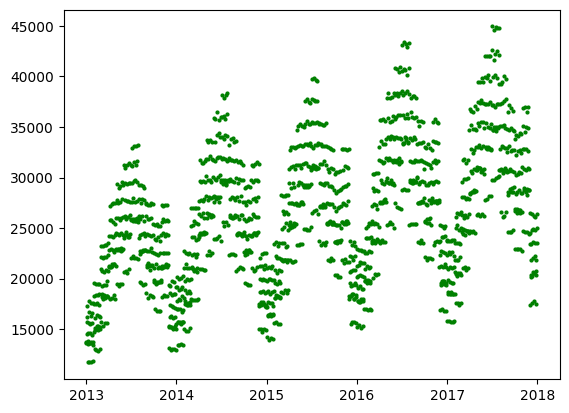

In [7]:
plt.plot(df_date['date'], df_date['sales'], 'go', ms=2)

In [8]:
#Create the polynomial fit to observe the trend.
x = df_date.index.to_numpy()
#Polynomial of degree 1
p1, res1, _, _ , _ = np.polyfit(x, df_date['sales'], 1, full=True)
p1_fn = np.poly1d(p1)
#Polynomial of degree 2
p2, res2, _, _ , _ = np.polyfit(x, df_date['sales'], 2, full=True)
p2_fn = np.poly1d(p2)

print("Trend (linear):", p1, res1)
print("Trend (quadratic):", p2, res2)

Trend (linear): [5.35209226e+00 2.12413593e+04] [6.06459705e+10]
Trend (quadratic): [-1.85429419e-03  8.73617916e+00  2.02125969e+04] [6.02581882e+10]


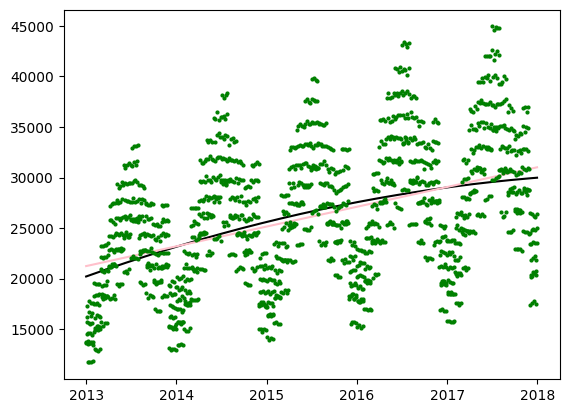

In [9]:
#graphic the data and the polynomial fit to observe the trend
plt.plot(df_date['date'], p2_fn(x), 'k-')
plt.plot(df_date['date'], p1_fn(x), color ='pink',)
plt.plot(df_date['date'], df_date['sales'], 'go', ms=2)

In [10]:
df_date.set_index('date')

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237
...,...
2017-12-27,20378
2017-12-28,21885
2017-12-29,23535


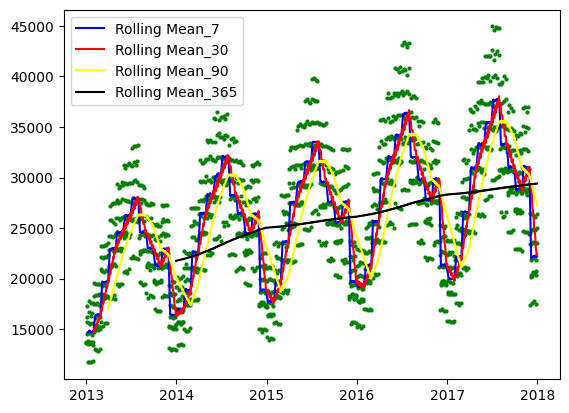

In [11]:
# calculate the rolling mean of different periods of time
plt.plot(df_date['date'], df_date['sales'], 'go', ms=2)
colores = {7: 'blue', 30 :'red',90 : 'yellow', 365: 'black'}
for i in [7,30,90,365]:
  rolling_mean = df_date['sales'].rolling(window=i).mean()
  plt.plot(df_date['date'], rolling_mean, label=f'Rolling Mean_{i}', color=colores[i])

plt.legend()

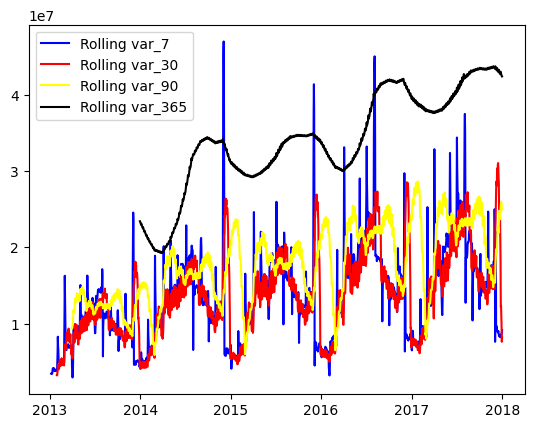

In [12]:
# calculate the rolling var of different periods of time
for i in [7,30,90,365]:
  rolling_var = df_date['sales'].rolling(window=i).var()
  plt.plot(df_date['date'], rolling_var, label=f'Rolling var_{i}', color=colores[i])
  plt.legend()

In [13]:
df_date.set_index('date',inplace = True)

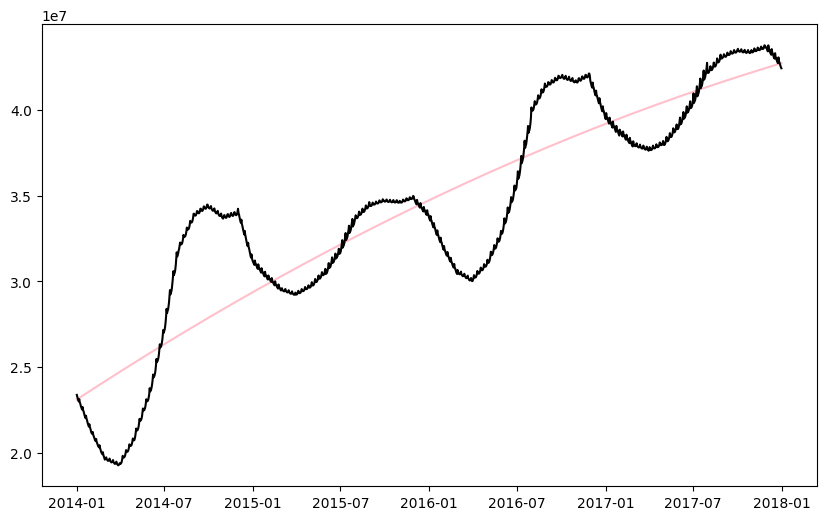

In [14]:
#Analyze the trend of the rolling variance
rolling_var = df_date['sales'].rolling(window=365).var()
# we ignore the NaN values
rolling_var= rolling_var[365:]
x = np.arange(len(rolling_var))
#Polynomial of degree 1
# Fit a polynomial to the rolling variance data
degree = 2
coefficients = np.polyfit(x, rolling_var, degree)
poly = np.poly1d(coefficients)
trend_line = poly(x)
# we plot the rolling var and it polynomial fit to observe its trend
plt.figure(figsize=(10,6))
plt.plot(rolling_var.index, trend_line, color ='pink',)
plt.plot(rolling_var, label=f'Rolling var_{365}', color= 'Black')

In [15]:
!pip install statsmodels

In [16]:
# We apply different statistical test to check if the serie is stationary or not
from statsmodels.tsa.stattools import adfuller, kpss

#perform augmented Dickey-Fuller test
adfuller(df_date)

(-3.0602441187013483,
 0.029638649268843572,
 21,
 1804,
 {'1%': -3.4339800605797155,
  '5%': -2.8631434696839992,
  '10%': -2.5676236347535166},
 29234.283115162158)

In [17]:
#Kwiatkowski-Phillips-Schmidt-Shin test for stationarity
kpss(df_date)

<ipython-input-17-99ba655e3c56>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df_date)


(2.0009508091109036,
 0.01,
 25,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Firstly, We did different plots with the polynomial fits to observe the trend of the data. Then we obtain an increasing trend of data over time but no very significant. Actually, we can see the polynomial fit of degree 2 stopping its growth at the end of the data. Also, one of the goals of the exercise is to determine if the data is stationary or not, in other words to check if the mean and variance is constant over the time. For that purpose we calculated and plotted the rolling mean and rolling variance of different periods of time (weeks, month, quarters and year). The rolling mean and var don't provide us relevant information when is calculated by weeks, months or quarters due to its cyclical character. However, when we plot the rolling mean and rolling variance by years we obtain a increasing trend of both over time. However, this growth does not seem to be very significant, so to test for stationarity we have carried out more specific statistical tests. These test are adfuller and kpss. Once these two tests have been applied, we obtain in both cases a p-value of less than 0.05, so we could conclude that there is no significant statistical evidence to affirm that the series is non-stationary. So the series is stationary.

### CYCLES

With the auto-correlation plot (AC), and Fourier analysis we aim to indentify the main cycles of the time series.

In [18]:
df_date

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237
...,...
2017-12-27,20378
2017-12-28,21885
2017-12-29,23535


Auto-correlación: 0.7573895525156338


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

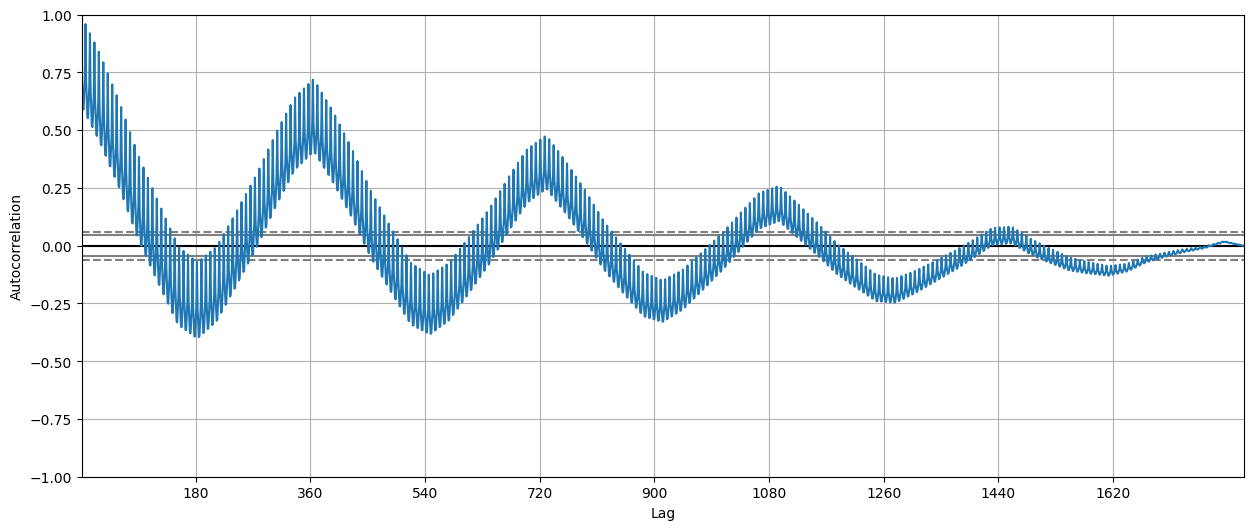

In [19]:
## CODE HERE

#autocorrelation plot
from pandas.plotting import autocorrelation_plot

print('Auto-correlación:', df_date['sales'].autocorr())
plt.figure(figsize=(15,6))
plt.xticks(np.arange(0,1800,180))
autocorrelation_plot(df_date)

In [20]:
import scipy as sp
import scipy.fftpack

temp_fft = sp.fftpack.fft(df_date['sales']) #_log_minus_mean)
temp_psd = np.abs(temp_fft) ** 2

print(temp_psd.shape)

(1826,)


In [21]:
# set freq_unit= 365 to check the cycles over the years (to check seasonality)
freq_unit = 1/365.
fftfreq = sp.fftpack.fftfreq(len(temp_psd), freq_unit)

i = fftfreq > 0

Text(0, 0.5, 'PSD')

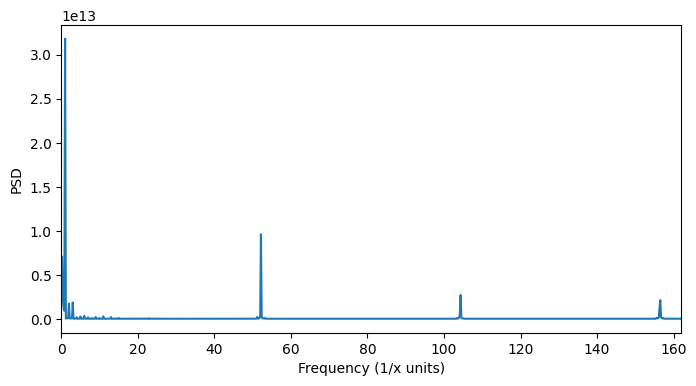

In [22]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], temp_psd[i])
ax.set_xlim(0, 162)
#plt.xticks(np.arange(0,162,10))
ax.set_xlabel('Frequency (1/x units)')
ax.set_ylabel('PSD')

Text(0, 0.5, 'PSD')

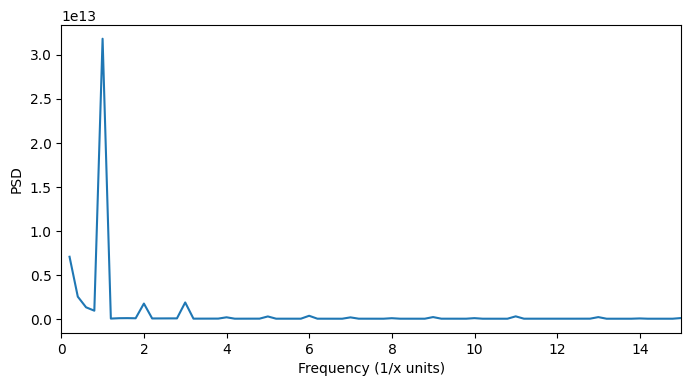

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], temp_psd[i])
ax.set_xlim(0, 15)
#plt.xticks(np.arange(0,162,10))
ax.set_xlabel('Frequency (1/x units)')
ax.set_ylabel('PSD')

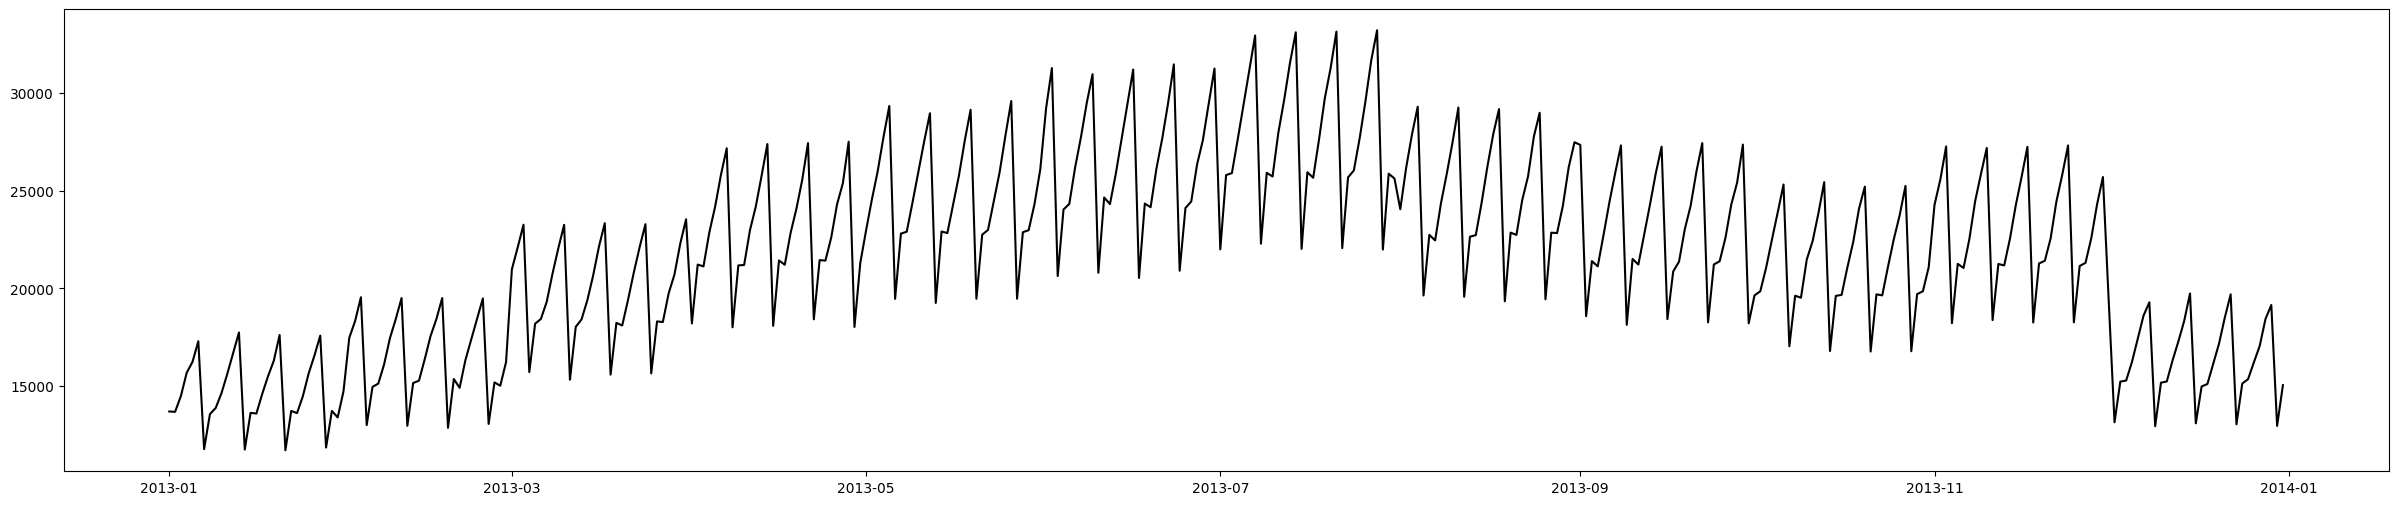

In [24]:
plt.figure(figsize=(30,6))
plt.plot(df_date[0:365], color = 'black')
#plt.plot(df_date[365:720], color = 'red')
#plt.plot(df_date[720:1085], color = 'green')

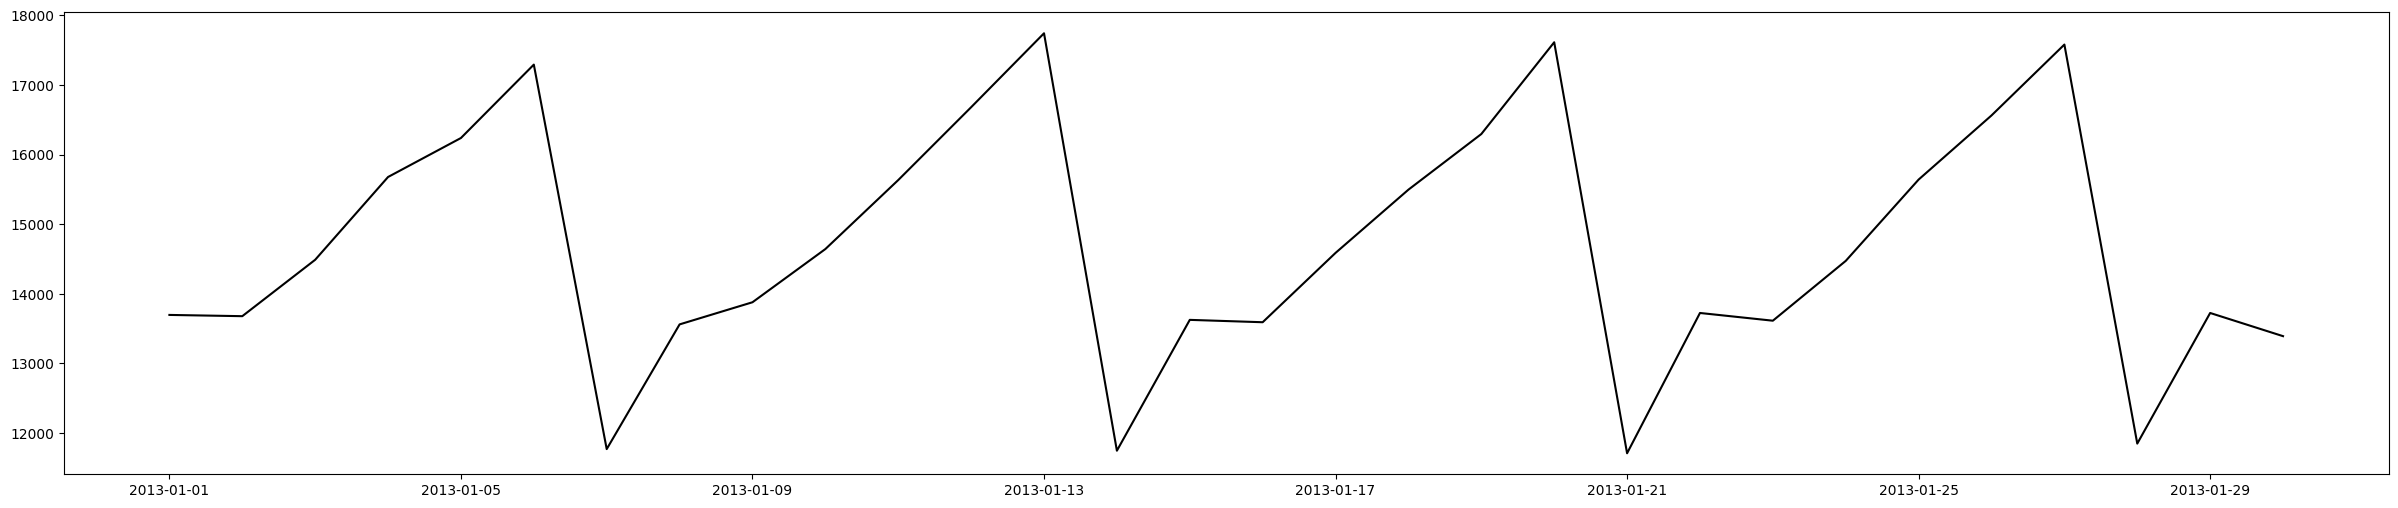

In [25]:
plt.figure(figsize=(30,6))
plt.plot(df_date[0:30], color = 'black')

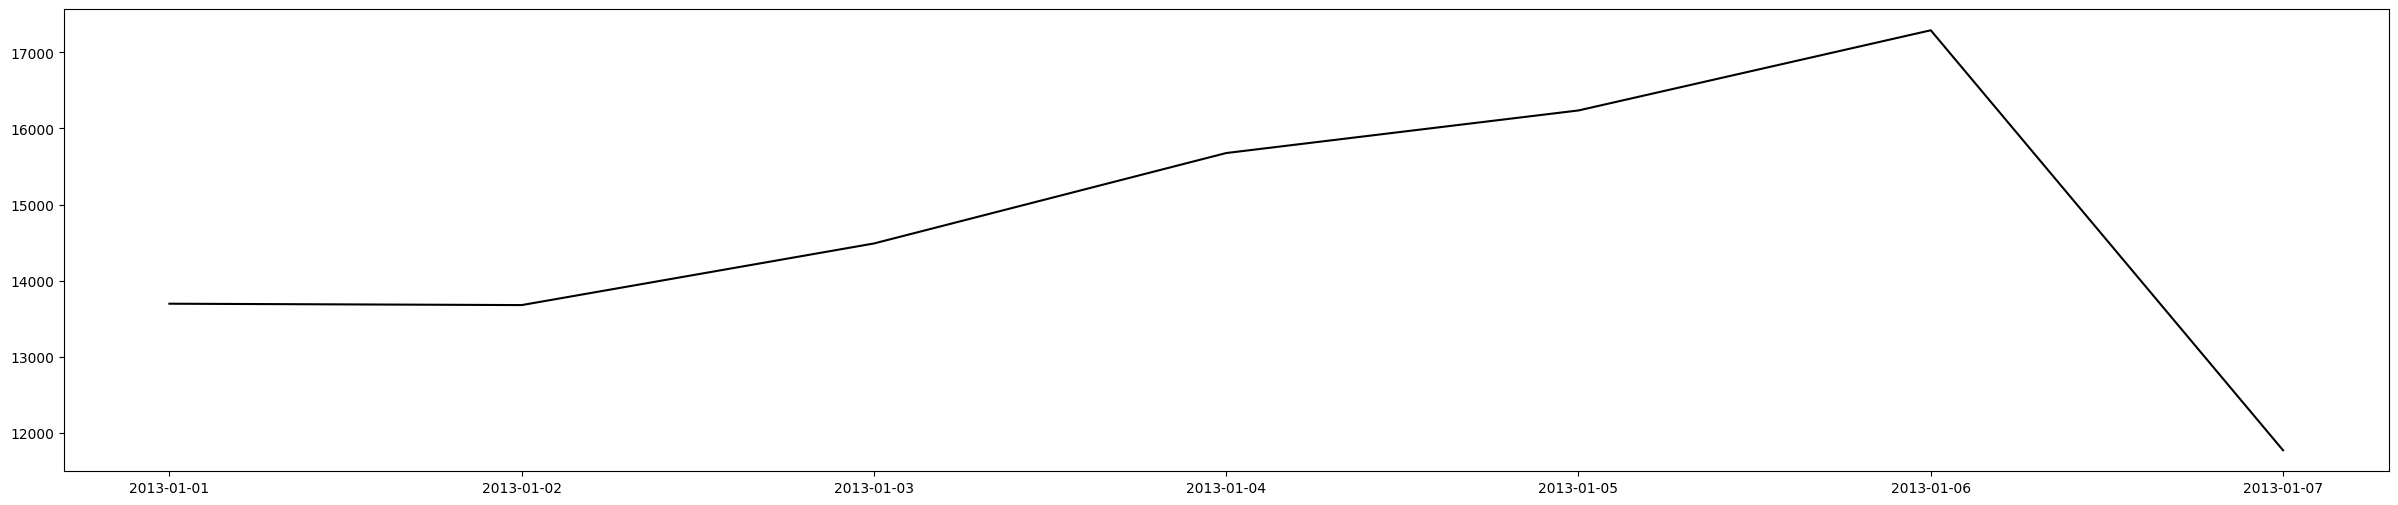

In [26]:
plt.figure(figsize=(30,6))
plt.plot(df_date[0:7], color = 'black')

To check seasonality we have different strategies ranging from the autocorrelation plot to the fourier analysis and even direct observation of the data.
In the autocorrelation plot we can see high correlations in the periods which more or less correspond to the period of half a year or a full year (the correlation of full year is higher). This may already indicate the existence of a cyclical pattern over the course of each year. Furthermore, looking at the one-year sales graph and the negative correlation that occurs every half year, we can conclude that this is due to the fact that every half year there is a pattern of growth-decrease in sales.
  
Visualising the frequency analysis we can observe that the highest peak is in the frequency 1 which indicates that there exists a cyclic pattern over years. Moreover we can observe different cyclic patterns in different periods. Generally over one month the pattern is cyclic over the weeks within the month. Also we can see that during each month the sales remain constant (following it's pattern over weeks.)
Finally, we can see that inside of the weeks we have a cyclic pattern in which in saturdays that reach the highest peak of sales and in sunday the sales drop off to normal values.


### NORMALIZATION

Check different methods for **normalization** and choose the best for performing a forecast.

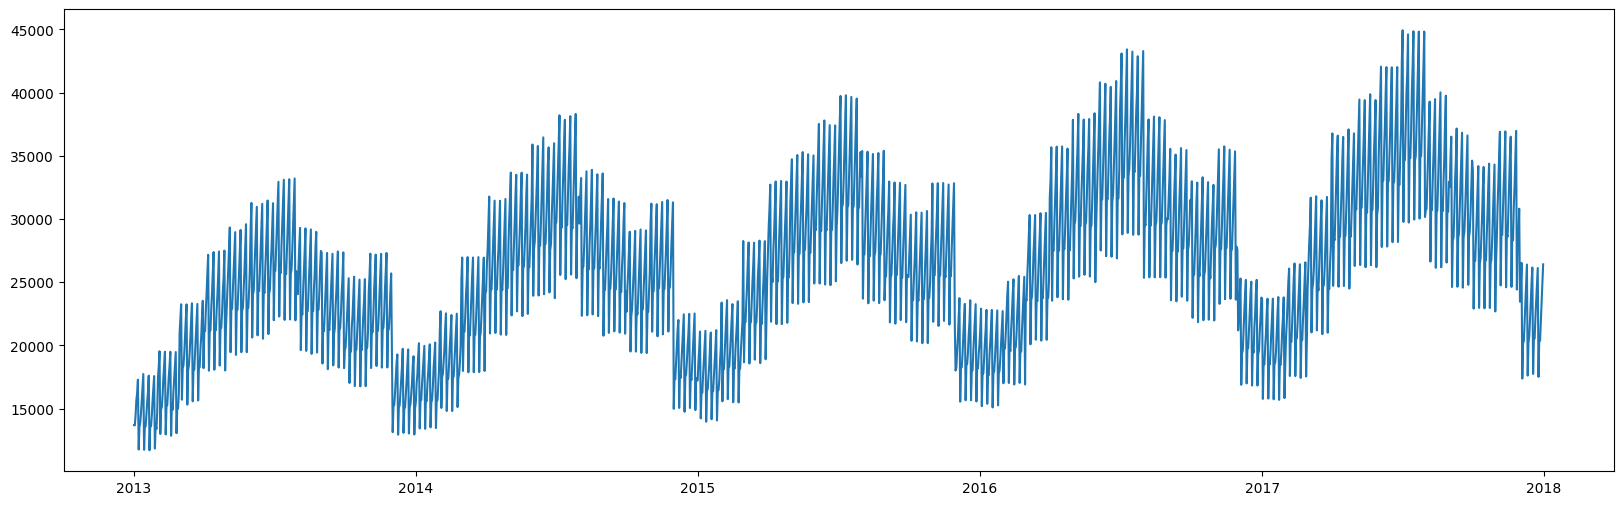

In [27]:
#Observe the df_date
plt.figure(figsize = (20,6))
plt.plot(df_date)

In [28]:
adfuller(df_date)

(-3.0602441187013483,
 0.029638649268843572,
 21,
 1804,
 {'1%': -3.4339800605797155,
  '5%': -2.8631434696839992,
  '10%': -2.5676236347535166},
 29234.283115162158)

<Axes: xlabel='date'>

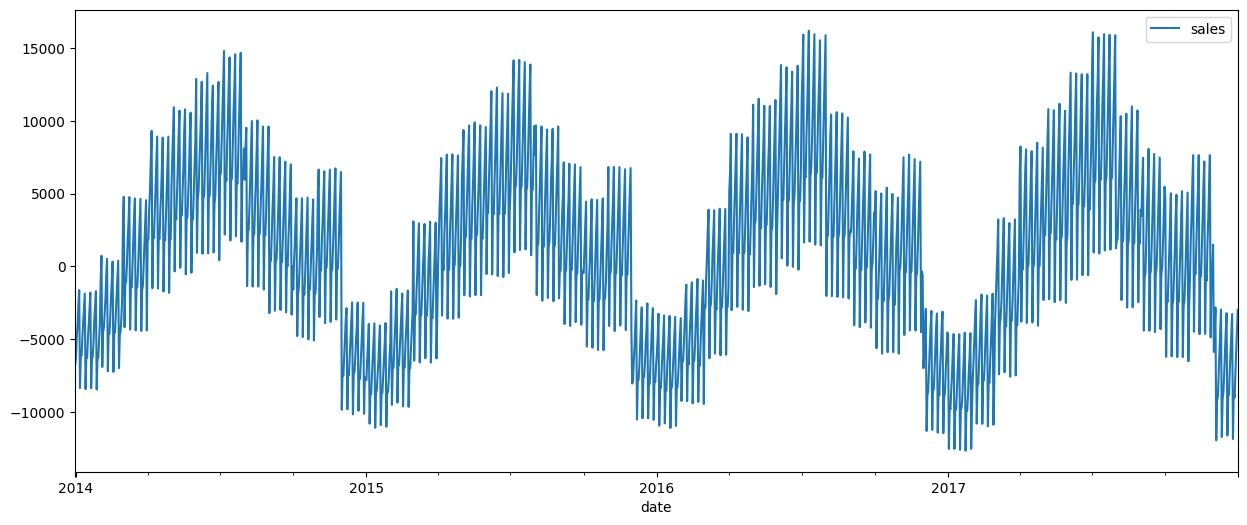

In [29]:
# MOVING AVERAGE METHOD OF NORMALIZATION

#we calculate the rolling shifted over a year
rolling_mean = df_date.rolling(window=365).mean()
#normalization: we subtract the moving average from the original data
df_date_minus_mean = df_date - rolling_mean
df_date_minus_mean.dropna(inplace=True)
df_date_minus_mean.plot(figsize=(15,6))

In [30]:
adfuller(df_date_minus_mean)

(-2.7161130809576157,
 0.07129126457864159,
 21,
 1440,
 {'1%': -3.434899302257815,
  '5%': -2.8635492080466607,
  '10%': -2.567839687982253},
 23429.35440285071)

                  sales
date                   
2013-01-01     0.000000
2013-01-02    -8.991454
2013-01-03   533.498490
2013-01-04  1290.646436
2013-01-05  1479.110040


(-2.8910599958154397,
 0.046397518857763574,
 21,
 1804,
 {'1%': -3.4339800605797155,
  '5%': -2.8631434696839992,
  '10%': -2.5676236347535166},
 29228.07756479575)

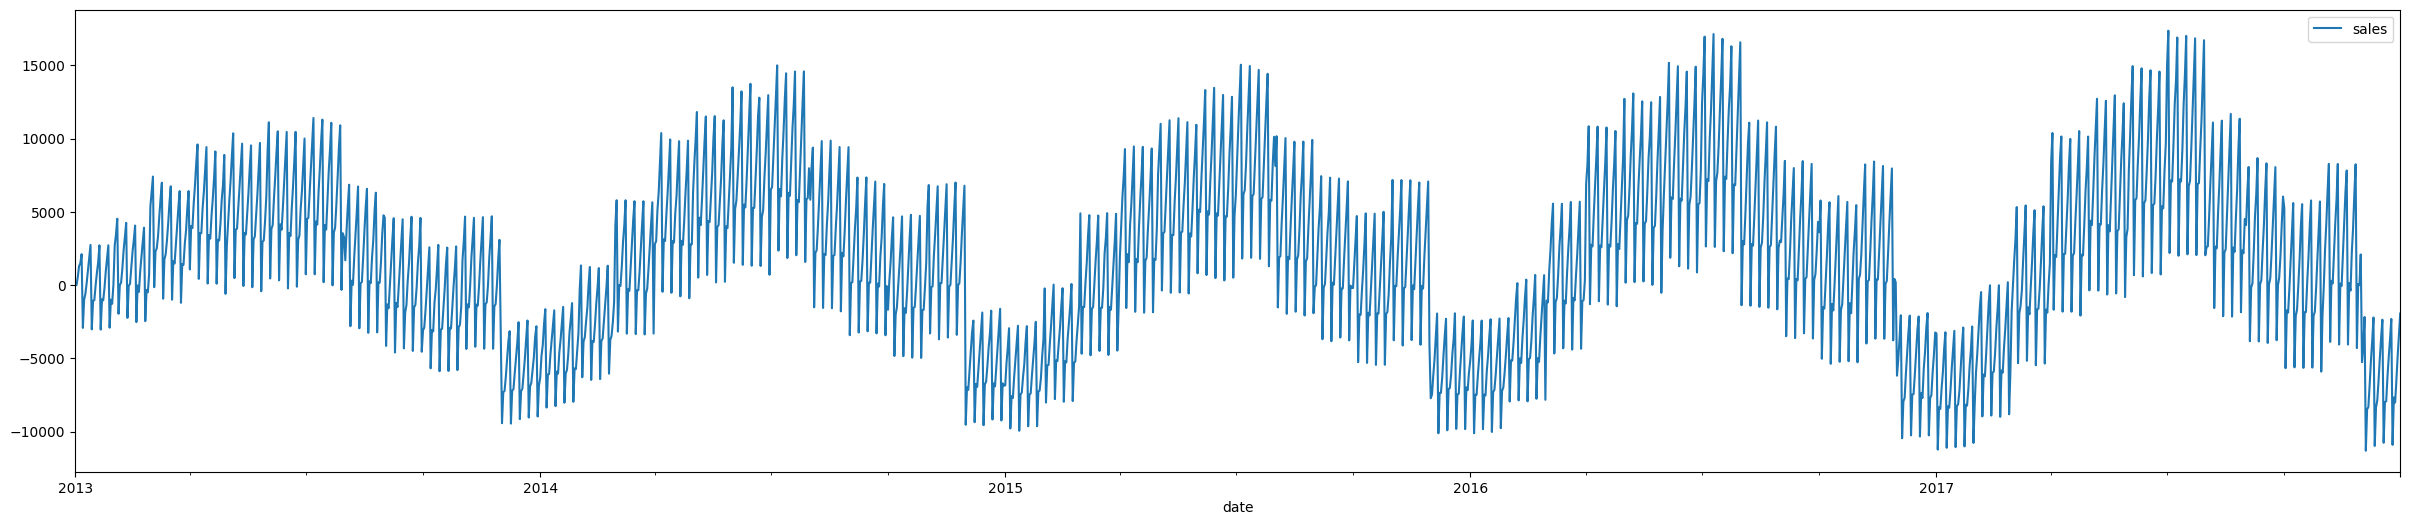

In [31]:
#EXPONENTIAL SMOOTHING NORMALIZATION
rolling_mean_exp_decay = df_date.ewm(halflife=365, min_periods=0, adjust=True).mean()
df_date_exp_decay = df_date - rolling_mean_exp_decay
df_date_exp_decay.dropna(inplace=True)

#Plotting the normalization
print(df_date_exp_decay.head())
df_date_exp_decay.plot(figsize=(30,6))

adfuller(df_date_exp_decay)

<Axes: xlabel='date'>

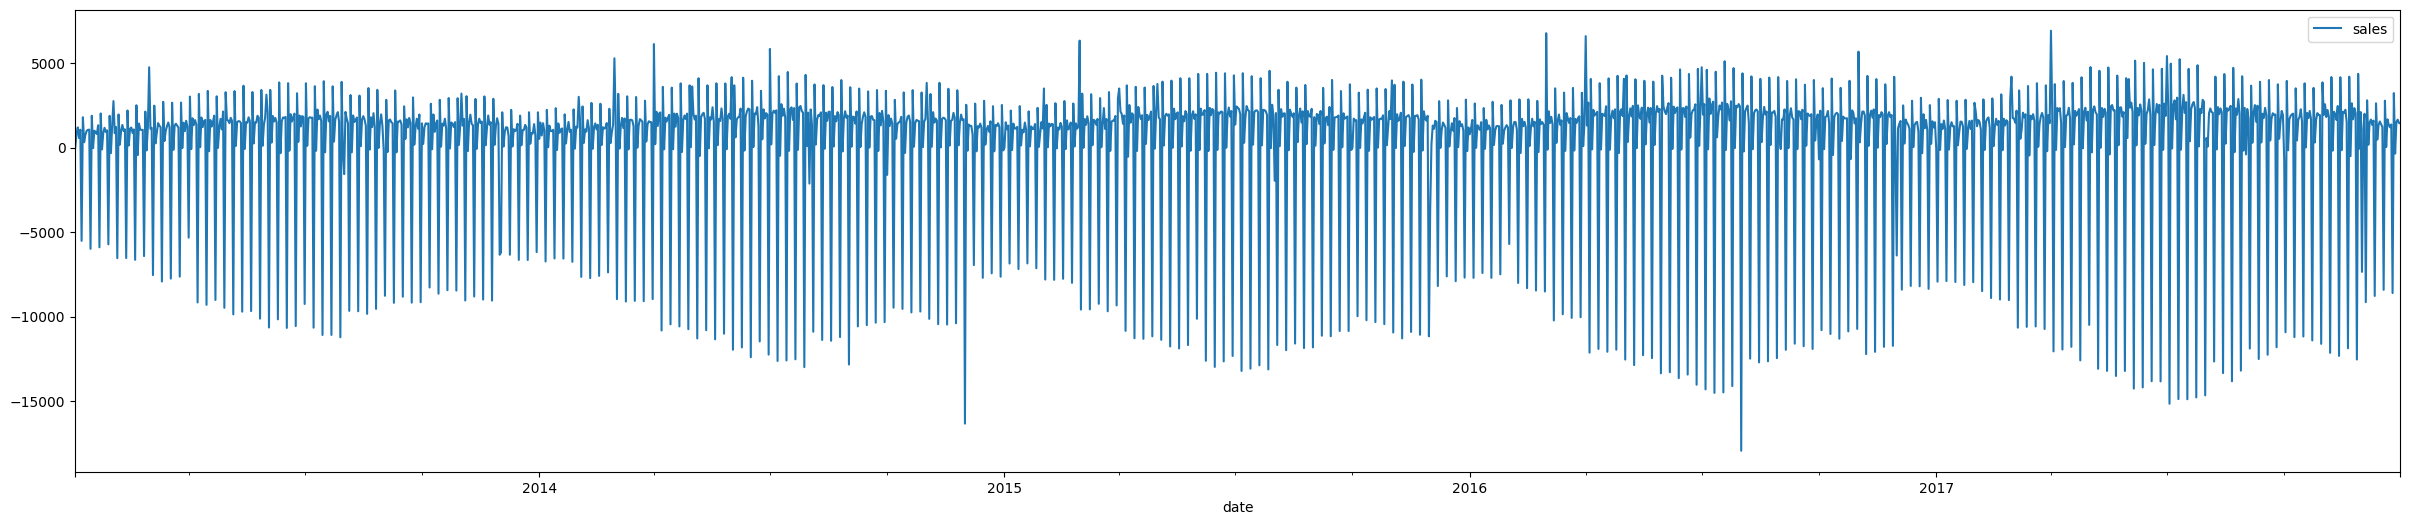

In [32]:
#DIFFERENTIATION METHOD OF NORMALIZATION
df_date_shift = df_date.diff()
df_date_shift.dropna(inplace=True)
df_date_shift.plot(figsize=(30,6))

In [33]:
adfuller(df_date_shift)

(-8.91902655980487,
 1.0533756813427437e-14,
 25,
 1799,
 {'1%': -3.433990164137254,
  '5%': -2.8631479299063405,
  '10%': -2.567626009684832},
 29224.74530520622)

One of the main objectives of normalisation is to obtain a stationary series from the original data. So that thanks to this stationary series we can use forecasting methods to estimate future values of the original series. In this case, we have used the methods of moving average normalisation, differentiation, exponential smoothing and even the original series since it is already stationary. As one of our objectives is to make predictions, we check of the ¨adfuller¨ test which of the series has a larger stationary component. So we have obtained the following p-values:0.01 (Normal data), 0.0713 (rolling mean), 0.0464 (exponential smoothing) and 1.053e-14 (differentiation). Therefore, the model with the most significant evidence of stationarity and therefore the most suitable for prediction would be the differentiation model.



## TIME SERIES FORECAST

Train **two forecasting models** for predicting the time series, one classical and another based on neural networks. Evaluate their quality with MAPE/RMSE metric.

You can use any of the models provided by DARTS:

https://unit8co.github.io/darts/#forecasting-models


In [34]:
df_date_shift.reset_index(inplace = True)

In [35]:
## CODE HERE
from darts.metrics import mape, rmse
from darts.models import Prophet
from darts import TimeSeries

series = TimeSeries.from_dataframe(df_date_shift.reset_index(), time_col='date', value_cols='sales')

In [36]:
# we use prophet model to make a prediction of the last half year
cut = -365

#Set Train Data and validation data
train, val = series[:cut], series[cut:]

#Prophet model
model2 = Prophet()

#Training the model
model2.fit(train)

#Calculate the predicted TimeSeries
prediction = model2.predict(len(val))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_prq8r9/r14iyqtq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp_prq8r9/1h5ym0pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14417', 'data', 'file=/tmp/tmpp_prq8r9/r14iyqtq.json', 'init=/tmp/tmpp_prq8r9/1h5ym0pi.json', 'output', 'file=/tmp/tmpp_prq8r9/prophet_modellmfnf61a/prophet_model-20231020132644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


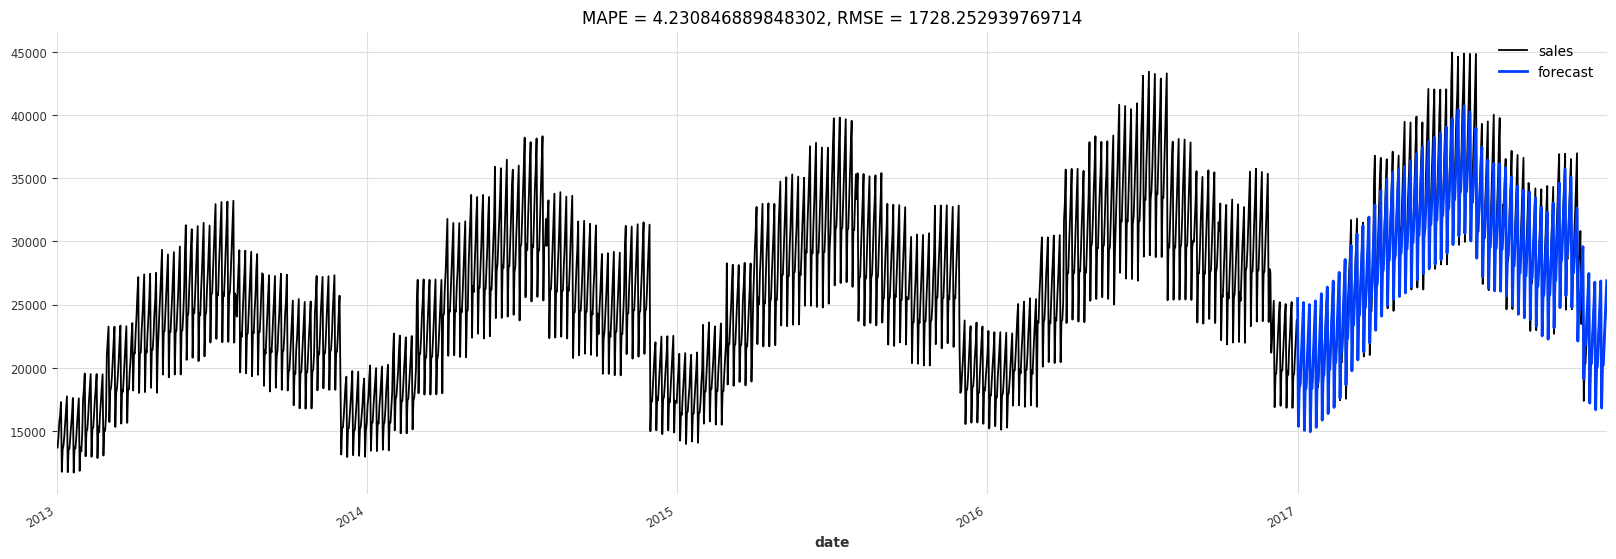

In [37]:
# we change to a dataframe to recover the "original" prediction
prediction_df = prediction.pd_dataframe()

#apply cumsum and sum the df_date['sales'][-366] to obtain the prediction of the reverse of differentiation, i.e. the original series.
prediction_inv = prediction_df.cumsum() + df_date['sales'][-366]

# calculate mape and rmse errors of prediction to ewvaluate the model
err_mape = mape(TimeSeries.from_dataframe(df_date.reset_index(), time_col='date', value_cols='sales'),TimeSeries.from_dataframe(prediction_inv))
err_rsme = rmse(TimeSeries.from_dataframe(df_date.reset_index(), time_col='date', value_cols='sales'),TimeSeries.from_dataframe(prediction_inv))

#Graphics
df_date.plot(figsize = (20,6))
TimeSeries.from_dataframe(prediction_inv).plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.title(f'MAPE = {err_mape}, RMSE = {err_rsme}')
plt.legend()

In [38]:
from darts.models import RNNModel

In [39]:
cut = -365
train, val = series[:cut], series[cut:]

In [40]:
len(train)

1460

In [48]:
from darts.models import NBEATSModel

# NBEEATSModel of neural network
modelNB = NBEATSModel(

    input_chunk_length=365,

    output_chunk_length=365,

    num_blocks=4,

    n_epochs=16,
)
#Training the model
modelNB.fit(train)
#Calculate the predicted TimeSeries
predictionNB = modelNB.predict(len(val))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 35.8 M
---------------------------------------------------
35.8 M    Trainable params
3.5 K     Non-trainable params
35.8 M    Total params
143.051   Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=16` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

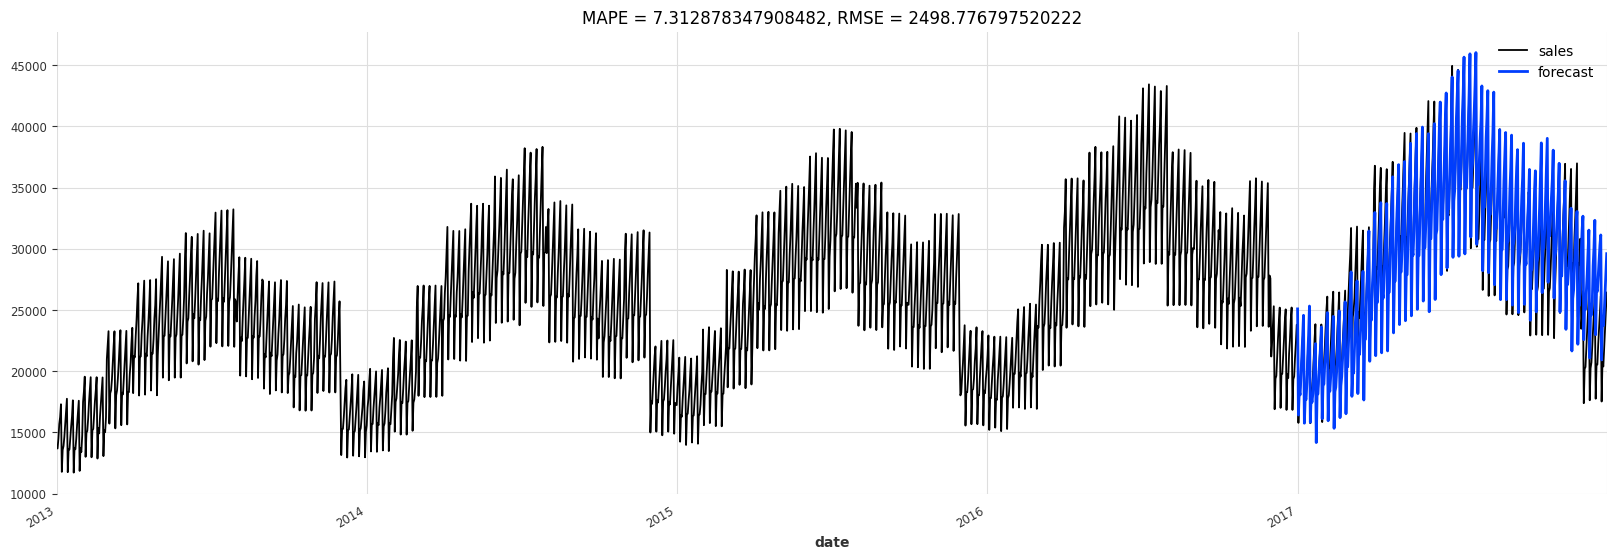

In [49]:
#apply cumsum and sum the df_date['sales'][-366] to obtain the prediction of the reverse of differentiation, i.e. the original series.
df_predictionNB = predictionNB.pd_dataframe()
pred_inv = df_predictionNB.cumsum() + df_date['sales'][-366]
# calculate mape and rmse errors of prediction to ewvaluate the model
err_mape = mape(TimeSeries.from_dataframe(df_date.reset_index(), time_col='date', value_cols='sales'),TimeSeries.from_dataframe(pred_inv))
err_rsme = rmse(TimeSeries.from_dataframe(df_date.reset_index(), time_col='date', value_cols='sales'),TimeSeries.from_dataframe(pred_inv))
#Graphics
df_date.plot(figsize = (20,6))
TimeSeries.from_dataframe(pred_inv).plot(label='forecast')
plt.title(f'MAPE = {err_mape}, RMSE = {err_rsme}')
plt.legend()

To forecast we use the differentiation data because of it's stationary. Note that we represent the inverse of the differentiation and the prediction to "recover" the original data.

In the case of prophet, we get the results very quickly and as we can see we get a fairly tight prediction with MAPE errors = 4.23, RMSE = 1728.25.   It should be noted that the RMSE gives us a high value because it is on the same scale as the data. However, it is quite low in proportion.  

As for NBEATS we have obtained a prediction with a higher error of both types even though we have used much more training time. However, the error varies each time the model is run obtaining quite variable results.

Intuitively one would think that the neural model could obtain much more accurate results but this need not be the case. In this case, we have a series with a lot of stationarity and holiday effects, which are the type of data on which PROPHET is most accurate.

Another reason why PROPHET obtains a better prediction may be due to the large variability of the data. Even though the data are stationary and cyclical, the data are not normalised and vary over a very wide range of values. For this reason N-BEATS, being a model quite sensitive to outliers, could obtain a less accurate prediction.

Finally, we have to remark that N-BEATs have a large number of hyperparametres. So we can increase the precission of forecast increasing the number of blocks or epochs but this leads to a very large increase in computing time.